In [1]:
# Import the necessary libraries.
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

# Import the car4u.csv data set and run the OLS on the data.
cars = pd.read_csv('car4u.csv')

# View the DataFrame.
print(cars.head())
print(cars.info())
cars.describe()

   Engine size  Selling price
0           77      79.775152
1           21      23.177279
2           22      25.609262
3           20      17.857388
4           36      41.849864
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Engine size    300 non-null    int64  
 1   Selling price  300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB
None


,Engine size,Selling price
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


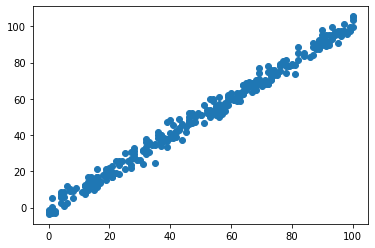

In [2]:
# Define the dependent variable.
y = cars['Selling price'] 

# Define the independent variable.
x = cars['Engine size'] 

# Check for homoscedasticity wiht Matplotlib.
plt.scatter(x, y)

The scatterplot demonstrates homoscedasticity because the data is evenly distributed and the data points are not in a cone shape! Let’s continue.

In [3]:
# Run the OLS model on the data.
f = 'y ~ x'

test = ols(f, data = cars).fit()

No output is provided. Therefore, we have no error message, and we can assume the data was fitted correctly.

In [4]:
# Import the necessary library.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 1.127927731684597, 'LM Test p-value': 0.2882177894391313, 'F-stat': 1.1246365760808064, 'F-test p-value': 0.2897810117091818}


According to our H0, we need the  p-value to determine homoscedasticity. Remember, if the calculated p-value is greater/bigger than 0.05, we fail to reject the H0, and assume that homoscedasticity is present. Since the LM Test p=0.288  , we fail to reject the  and assume homoscedasticity.